In [1]:
##save env file
!conda env export > combined_met_environment.yml

In [2]:
##import all modules here 
import pandas as pd
import matplotlib as plt
import glob
import os
import xml.etree.ElementTree as ET
from datetime import datetime, timezone
from tqdm import tqdm
import codecs
import csv

In [3]:
##set data directories
data_directory_xml = "/mnt/hgfs/shared/weather_warnings/archive_warnings/archive"
data_directory_ods = "/mnt/hgfs/shared/ul_project_Msc_AI/data/met_eireann/eda/Archived_Wx_Warnings_25April2012_17February2021.ods"
full_path_xml = os.path.abspath(data_directory_xml)
full_path_ods = os.path.abspath(data_directory_ods)


if os.path.exists(data_directory_xml):
    print(f"XML format directory exists: {data_directory_xml}")
else:
    print(f"XML format directory does not exist: {data_directory_xml}")
print(os.getcwd())

if os.path.exists(data_directory_ods):
    print(f"ODS format directory exists: {data_directory_ods}")
else:
    print(f"ODS format directory does not exist: {data_directory_ods}")
print(os.getcwd())

XML format directory exists: /mnt/hgfs/shared/weather_warnings/archive_warnings/archive
/mnt/hgfs/shared/ul_project_Msc_AI/data/met_eireann/eda
ODS format directory exists: /mnt/hgfs/shared/ul_project_Msc_AI/data/met_eireann/eda/Archived_Wx_Warnings_25April2012_17February2021.ods
/mnt/hgfs/shared/ul_project_Msc_AI/data/met_eireann/eda


In [4]:
# Read the .ods file
df_ods = pd.read_excel(full_path_ods, engine='odf', parse_dates=['Issue Time', 'Valid From', 'Valid To'])

# check the first few rows
print(df_ods.head())

# look at dataframe info
print(df_ods.info())

# check the df shape
print(f"Number of rows: {df_ods.shape[0]}")
print(f"Number of columns: {df_ods.shape[1]}")

print("ODS Filtered Date Range:")
print(f"Start date: {df_ods['Issue Time'].min()}")
print(f"End date: {df_ods['Issue Time'].max()}")

           Issue Time          Valid From            Valid To Warning Colour  \
0 2012-04-25 12:00:00 2012-04-25 12:00:00 2012-04-26 12:00:00         Yellow   
1 2012-06-01 21:00:00 2012-06-02 12:00:00 2012-06-03 21:00:00         Yellow   
2 2012-06-02 14:00:00 2012-06-02 14:00:00 2012-06-03 12:00:00         Orange   
3 2012-06-08 10:00:00 2012-06-08 10:00:00 2012-06-08 23:59:00         Yellow   
4 2012-06-14 20:00:00 2012-06-14 20:00:00 2012-06-16 12:00:00         Yellow   

  Warning Element                                        WhereToText  \
0            Rain                               Munster and Leinster   
1            Rain                     Munster, Connacht and Leinster   
2            Rain                               Munster and Leinster   
3            Rain                              Connacht and Leinster   
4            Rain  Munster, Leinster, Connacht, Donegal, Monaghan...   

                                        Warning Text  Munster  Clare   Cork  \
0  Heav

In [5]:
df_ods.head()

,Issue Time,Valid From,Valid To,Warning Colour,Warning Element,WhereToText,Warning Text,Munster,Clare,Cork,...,Ulster,Cavan,Donegal,Monaghan,Connacht,Galway,Leitrim,Mayo,Roscommon,Sligo
0,2012-04-25 12:00:00,2012-04-25 12:00:00,2012-04-26 12:00:00,Yellow,Rain,Munster and Leinster,Heavy rain moving into Southern coastal counti...,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,2012-06-01 21:00:00,2012-06-02 12:00:00,2012-06-03 21:00:00,Yellow,Rain,"Munster, Connacht and Leinster","Between 25 and 65 mm of rain possible, (heavie...",True,True,True,...,False,False,False,False,True,True,True,True,True,True
2,2012-06-02 14:00:00,2012-06-02 14:00:00,2012-06-03 12:00:00,Orange,Rain,Munster and Leinster,Between 25mm & 65mm of rain expected over Lein...,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,2012-06-08 10:00:00,2012-06-08 10:00:00,2012-06-08 23:59:00,Yellow,Rain,Connacht and Leinster,Further persistent and sometimes heavy rain to...,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,2012-06-14 20:00:00,2012-06-14 20:00:00,2012-06-16 12:00:00,Yellow,Rain,"Munster, Leinster, Connacht, Donegal, Monaghan...","Further spells of rain, persistant and heavy a...",True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
(df_ods.isna().sum()/df_ods.shape[0] * 100).sort_values()

Issue Time         0.000000
Longford           0.000000
Louth              0.000000
Meath              0.000000
Offaly             0.000000
Westmeath          0.000000
Wexford            0.000000
Wicklow            0.000000
Ulster             0.000000
Cavan              0.000000
Donegal            0.000000
Monaghan           0.000000
Connacht           0.000000
Galway             0.000000
Leitrim            0.000000
Mayo               0.000000
Laois              0.000000
Kilkenny           0.000000
Kildare            0.000000
Dublin             0.000000
Valid From         0.000000
Valid To           0.000000
Warning Colour     0.000000
Warning Element    0.000000
Munster            0.000000
Roscommon          0.000000
Cork               0.000000
Clare              0.000000
Limerick           0.000000
Tipperary          0.000000
Tipperary SR       0.000000
Waterford          0.000000
Leinster           0.000000
Carlow             0.000000
Kerry              0.000000
Sligo              0

## ODS - MEt Eirean old system (manual) for recording Adverse weather
Start date: 2012-04-25 12:00:00
End date: 2021-02-17 09:00:00
only 1654 events in totat which seems low compared to the new rss xml system even with Advisories removed
will use data from 2013 to when the new system starts in 2018 


#####
always take note of how many rows / columns information thats dropped and why
check for events on same dau one with info one without or missing inbetween 

In [7]:
##we dont need provinces will add hse regions after combined
df_ods= df_ods.drop(['Connacht', 'Leinster', 'Munster', 'Ulster'], axis=1)

In [8]:
df_ods.head()

,Issue Time,Valid From,Valid To,Warning Colour,Warning Element,WhereToText,Warning Text,Clare,Cork,Kerry,...,Wexford,Wicklow,Cavan,Donegal,Monaghan,Galway,Leitrim,Mayo,Roscommon,Sligo
0,2012-04-25 12:00:00,2012-04-25 12:00:00,2012-04-26 12:00:00,Yellow,Rain,Munster and Leinster,Heavy rain moving into Southern coastal counti...,True,True,True,...,True,True,False,False,False,False,False,False,False,False
1,2012-06-01 21:00:00,2012-06-02 12:00:00,2012-06-03 21:00:00,Yellow,Rain,"Munster, Connacht and Leinster","Between 25 and 65 mm of rain possible, (heavie...",True,True,True,...,True,True,False,False,False,True,True,True,True,True
2,2012-06-02 14:00:00,2012-06-02 14:00:00,2012-06-03 12:00:00,Orange,Rain,Munster and Leinster,Between 25mm & 65mm of rain expected over Lein...,True,True,True,...,True,True,False,False,False,False,False,False,False,False
3,2012-06-08 10:00:00,2012-06-08 10:00:00,2012-06-08 23:59:00,Yellow,Rain,Connacht and Leinster,Further persistent and sometimes heavy rain to...,False,False,False,...,True,True,False,False,False,True,True,True,True,True
4,2012-06-14 20:00:00,2012-06-14 20:00:00,2012-06-16 12:00:00,Yellow,Rain,"Munster, Leinster, Connacht, Donegal, Monaghan...","Further spells of rain, persistant and heavy a...",True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
# Convert boolean counties to binary (0/1)
df_ods = df_ods.astype({col: int for col in df_ods.select_dtypes(include=['bool']).columns})

In [1]:
# Create a copy of the filtered dataf
df_ods = df_ods.copy()

# Now do the merge
df_ods['Tipperary'] = df_ods[['Tipperary', 'Tipperary SR']].max(axis=1)
df_ods = df_ods.drop('Tipperary SR', axis=1)

NameError: name 'df_ods' is not defined

# XML data parsing

In [11]:
def severity_to_color(severity):
    """Map severity levels to warning colors"""
    mapping = {
        'Extreme': 'Red',
        'Severe': 'Orange',
        'Moderate': 'Yellow'
    }
    return mapping.get(severity, 'Yellowish')  # Default to Yellow if unknown

def get_element_text(element, path, namespace):
    """Safely get text from an XML element"""
    found = element.find(path, namespace)
    return found.text if found is not None else None

def parse_xml(file_path_xml):
    """Parse an XML file and extract relevant information."""
    try:
        # Read the file content
        with codecs.open(file_path_xml, 'r', encoding='utf-8', errors='ignore') as file:
            xml_content = file.read()
        
        # Parse the XML content
        root = ET.fromstring(xml_content)
        namespace = {'cap': 'urn:oasis:names:tc:emergency:cap:1.2'}
        
        # Extract data from the info element first to check if we should process this warning
        info = root.find('cap:info', namespace)
        if info is None:
            return None
            
        # Check for advisory warnings (type 22) - exclude them
        parameters = info.findall('cap:parameter', namespace)
        for param in parameters:
            if get_element_text(param, 'cap:valueName', namespace) == 'awareness_type':
                awareness_type = get_element_text(param, 'cap:value', namespace)
                if awareness_type and '22' in awareness_type:
                    return None
                break
        
        # Check for county information
        area = info.find('cap:area', namespace)
        if area is None:
            return None
            
        geocodes = area.findall('cap:geocode', namespace)
        if not geocodes:
            return None

        # Initialize row with the old column format
        row = {
            'Issue Time': get_element_text(root, 'cap:sent', namespace),
            'Valid From': (get_element_text(info, 'cap:effective', namespace) or 
                         get_element_text(info, 'cap:onset', namespace)),
            'Valid To': get_element_text(info, 'cap:expires', namespace),
            'Warning Element': get_element_text(info, 'cap:event', namespace),
            'Warning Text': get_element_text(info, 'cap:description', namespace),
            'WhereToText': get_element_text(area, 'cap:areaDesc', namespace),
            'Warning Colour': severity_to_color(get_element_text(info, 'cap:severity', namespace))
        }
        
        # Initialize all county columns to 0
        county_info = {
            'EI01': 'Carlow', 'EI02': 'Cavan', 'EI03': 'Clare', 'EI04': 'Cork', 'EI32': 'Cork City',
            'EI06': 'Donegal', 'EI33': 'Dublin City', 'EI34': 'Dún Laoghaire-Rathdown', 'EI35': 'Fingal',
            'EI10': 'Galway', 'EI36': 'Galway City', 'EI11': 'Kerry', 'EI12': 'Kildare', 'EI13': 'Kilkenny',
            'EI15': 'Laois', 'EI14': 'Leitrim', 'EI42': 'Limerick', 'EI37': 'Limerick City', 'EI18': 'Longford',
            'EI19': 'Louth', 'EI20': 'Mayo', 'EI21': 'Meath', 'EI22': 'Monaghan', 'EI23': 'Offaly',
            'EI24': 'Roscommon', 'EI25': 'Sligo', 'EI39': 'South Dublin', 'EI43': 'Tipperary',
            'EI44': 'Waterford', 'EI29': 'Westmeath', 'EI30': 'Wexford', 'EI31': 'Wicklow'
        }
        
        # Initialize all counties to 0
        for county_name in county_info.values():
            row[county_name] = 0
            
        # Set affected counties to 1
        for gc in geocodes:
            if get_element_text(gc, 'cap:valueName', namespace) == 'FIPS':
                county_code = get_element_text(gc, 'cap:value', namespace)
                if county_code in county_info:
                    row[county_info[county_code]] = 1
        
        return row
    
    except ET.ParseError as e:
        return None
    except Exception as e:
        return None

def process_files(data_directory):
    """Process all XML files in the given directory and extract weather warning data."""
    file_pattern = os.path.join(data_directory, '*.xml')
    file_list = glob.glob(file_pattern)

    data = []
    error_files = []
    excluded_files = []

    for file in tqdm(file_list, desc="Processing files"):
        row = parse_xml(file)
        if row is not None:
            data.append(row)
        else:
            try:
                with codecs.open(file, 'r', encoding='utf-8', errors='ignore') as f:
                    ET.parse(f)
                excluded_files.append(file)
            except:
                error_files.append(file)

    # Create DataFrame
    df_xml = pd.DataFrame(data)

    # Convert date fields to datetime
    date_columns = ['Issue Time', 'Valid From', 'Valid To']
    for col in date_columns:
        if col in df_xml.columns:
            df_xml[col] = pd.to_datetime(df_xml[col], utc=True, errors='coerce')

    return df_xml, error_files, excluded_files

def save_error_files(file_list, filename):
    """Save list of error files to CSV"""
    pd.DataFrame({'file': file_list}).to_csv(filename, index=False)


df_xml, error_files, excluded_files = process_files(data_directory_xml)

# Save results
# df_xml.to_csv('weather_warnings.csv', index=False)
save_error_files(error_files, 'error_files.csv')
save_error_files(excluded_files, 'excluded_files.csv')

Processing files: 100%|██████████| 10697/10697 [03:16<00:00, 54.53it/s]


In [12]:
# check the first few rows
print(df_xml.head())

# look at dataframe info
print(df_xml.info())

# check the df shape
print(f"Number of rows: {df_xml.shape[0]}")
print(f"Number of columns: {df_xml.shape[1]}")

print("XML Filtered Date Range:")
print(f"Start date: {df_xml['Issue Time'].min()}")
print(f"End date: {df_xml['Issue Time'].max()}")

                 Issue Time                Valid From  \
0 2018-03-29 19:46:16+00:00 2018-03-22 23:00:01+00:00   
1 2018-03-29 19:50:05+00:00 2018-03-29 19:00:01+00:00   
2 2018-03-29 21:56:16+00:00 2018-03-29 19:00:01+00:00   
3 2018-03-29 23:10:21+00:00 2018-03-29 19:00:01+00:00   
4 2018-03-30 04:15:33+00:00 2018-03-29 19:00:01+00:00   

                   Valid To            Warning Element  \
0 2018-03-23 09:00:01+00:00      Moderate Hail warning   
1 2018-03-30 09:00:01+00:00      Moderate Hail warning   
2 2018-03-30 09:00:01+00:00      Moderate Hail warning   
3 2018-03-30 09:00:01+00:00  Moderate Snow-ice warning   
4 2018-03-30 09:00:01+00:00      Moderate Hail warning   

                                        Warning Text WhereToText  \
0  Heavy showery rain continuing overnight with s...     Ireland   
1  Heavy showery rain overnight with some wintry ...     Ireland   
2  Heavy showery rain overnight with some wintry ...     Ireland   
3  Heavy showery rain overnight with

In [34]:
##make sure datetime is the same in both dataframes
# Ensure datetime columns are consistently UTC
datetime_cols = ['Issue Time', 'Valid From', 'Valid To']
df_ods[datetime_cols] = df_ods[datetime_cols].apply(pd.to_datetime, utc=True)
df_xml[datetime_cols] = df_xml[datetime_cols].apply(pd.to_datetime, utc=True)

In [50]:
print("ODS Filtered Date Range:")
print(f"Start date: {df_ods['Issue Time'].min()}")
print(f"End date: {df_ods['Issue Time'].max()}")

print("XML Filtered Date Range:")
print(f"Start date: {df_xml['Issue Time'].min()}")
print(f"End date: {df_xml['Issue Time'].max()}")

ODS Filtered Date Range:
Start date: 2012-04-25 12:00:00+00:00
End date: 2021-02-17 09:00:00+00:00
XML Filtered Date Range:
Start date: 2017-09-25 04:34:48+00:00
End date: 2023-08-05 11:33:52+00:00


In [3]:
## filter data use as much as possibel from the newer xml type
# Filter ODS data from 2013 to end of 2017
### check plots on date change check for duplicates 
df_ods_filtered = df_ods[
    (df_ods['Issue Time'] >= '2013-01-01') & 
    (df_ods['Issue Time'] <= '2017-09-24 23:59:59')
]

# Filter XML data from start of 2018 to 2023
df_xml_filtered = df_xml[
    (df_xml['Issue Time'] >= '2017-09-25') & 
    (df_xml['Issue Time'] <= '2022-12-31 23:59:59')
]

NameError: name 'df_ods' is not defined

In [2]:
##do we have duplicates 
df_xml_filtered.duplicated().sum()

NameError: name 'df_xml' is not defined

In [52]:
##deal with cities and dublin broken up 
####this could have caused duplicates check dates times before/after  
df_xml_filtered = df_xml_filtered.copy()

# Merge Cork City into Cork
df_xml_filtered['Cork'] = df_xml_filtered[['Cork', 'Cork City']].max(axis=1)

# Merge all Dublin areas into Dublin
df_xml_filtered['Dublin'] = df_xml_filtered[['Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'South Dublin']].max(axis=1)

# Merge Galway City into Galway
df_xml_filtered['Galway'] = df_xml_filtered[['Galway', 'Galway City']].max(axis=1)

# Merge Limerick City into Limerick
df_xml_filtered['Limerick'] = df_xml_filtered[['Limerick', 'Limerick City']].max(axis=1)

# Drop the city columns
city_columns = ['Cork City', 'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'South Dublin', 'Galway City', 'Limerick City']
df_xml_filtered = df_xml_filtered.drop(city_columns, axis=1)

In [53]:
# Combine the dataframes
df_combined = pd.concat([df_ods_filtered, df_xml_filtered], axis=0, ignore_index=True)

# Basic checks
print("Combined dataset shape:", df_combined.shape)
print("\nDate range:")
print("Start date:", df_combined['Issue Time'].min())
print("End date:", df_combined['Issue Time'].max())
print("\nNumber of warnings per year:")
print(df_combined['Issue Time'].dt.year.value_counts().sort_index())
print("\nCheck for any missing values:")
#print(df_combined.isnull().sum())
#print(df_xml_filtered.isnull().sum())
#print(df_ods_filtered.isnull().sum())

Combined dataset shape: (8311, 33)

Date range:
Start date: 2013-02-21 18:00:00+00:00
End date: 2022-12-30 05:10:24+00:00

Number of warnings per year:
Issue Time
2013     135
2014     180
2015     255
2016     122
2017     439
2018    2230
2019    1116
2020    1936
2021    1003
2022     895
Name: count, dtype: int64

Check for any missing values:


In [54]:
print(df_combined[df_combined['Valid To'].isnull()][['Issue Time', 'Valid From', 'Valid To', 'Warning Element', 'Warning Text']])


                   Issue Time                Valid From Valid To  \
993 2017-10-16 11:44:33+00:00 2017-10-16 11:44:33+00:00      NaT   

         Warning Element                                       Warning Text  
993  Severe Wind warning  Cyclonic variable Storm force 10 to Hurricane ...  


In [55]:
# Get the index of the row with missing Valid To
missing_idx = df_combined[df_combined['Valid To'].isnull()].index

# Set Valid To to 24 hours after Valid From for that row
df_combined.loc[missing_idx, 'Valid To'] = df_combined.loc[missing_idx, 'Valid From'] + pd.Timedelta(hours=24)

In [56]:
df_combined.to_csv('weather_warnings_combined.csv', index=False)

##improvement use single dictionary , replace method 

In [57]:
# Create a copy of the dataframe
df_combined = df_combined.copy()

print("Before mapping - Yellow warnings:")
print(df_combined[df_combined['Warning Colour'] == 'Yellow']['Warning Element'].value_counts())

# Modified mapping approach
mask = (df_combined['Warning Colour'] == 'Yellow')
conditions = [
    (mask & (df_combined['Warning Element'].isin(['Wind', 'Yellow Wind']))),
    (mask & (df_combined['Warning Element'].isin(['Rain', 'Yellow Rain']))),
    (mask & (df_combined['Warning Element'].isin(['Snow/Ice', 'Yellow Snow/Ice', 'Moderate snow-ice warning']))),
    (mask & (df_combined['Warning Element'].isin(['High Temperature', 'Yellow High Temperature']))),
    (mask & (df_combined['Warning Element'].isin(['Low Temperature/Ice', 'Yellow Low Temperature/Ice']))),
    (mask & (df_combined['Warning Element'].isin(['Fog (or freezing fog)', 'Yellow fog']))),
    (mask & (df_combined['Warning Element'].isin(['Thunderstorm', 'Yellow Thunderstorm'])))
]

choices = [
    'Moderate Wind warning',
    'Moderate Rainfall warning',
    'Moderate Snow-ice warning',
    'Moderate High-Temperature warning',
    'Moderate Low-Temperature warning',
    'Moderate Fog warning',
    'Moderate Thunder warning'
]

# Only update values that need to be changed
for condition, choice in zip(conditions, choices):
    df_combined.loc[condition, 'Warning Element'] = choice

print("\nAfter mapping - Yellow warnings:")


print(df_combined[df_combined['Warning Colour'] == 'Yellow']['Warning Element'].value_counts())

Before mapping - Yellow warnings:
Warning Element
Moderate Wind warning                1832
Moderate Rainfall warning            1540
Moderate Snow-ice warning             873
Yellow Wind                           487
Yellow Rain                           482
Wind                                  267
Rain                                  191
Moderate Low-Temperature warning      153
Yellow Thunderstorm                   101
Moderate Thunder warning               79
Yellow Low Temperature/Ice             72
Snow/Ice                               70
Yellow Snow/Ice                        65
Moderate High-Temperature warning      62
Yellow fog                             50
Yellow High Temperature                35
Low Temperature/Ice                    25
Moderate Fog warning                   23
Moderate Advisory warning              18
High Temperature                       11
Moderate Hail warning                   8
Fog (or freezing fog)                   7
Moderate snow-ice warning 

In [60]:
# Create a copy of the dataframe
df_combined = df_combined.copy()

# Orange warnings mapping - using the same approach that worked for Yellow
mask = (df_combined['Warning Colour'] == 'Orange')
orange_conditions = [
    (mask & (df_combined['Warning Element'].isin(['Wind', 'Orange Wind']))),
    (mask & (df_combined['Warning Element'].isin(['Rain', 'Orange Rain']))),
    (mask & (df_combined['Warning Element'].isin(['Snow/Ice', 'Orange Snow/Ice', 'Severe snow-ice warning']))),
    (mask & (df_combined['Warning Element'].isin(['Low Temperature/Ice', 'Orange Low Temperature/Ice']))),
    (mask & (df_combined['Warning Element'].isin(['Fog (or freezing fog)', 'Orange Fog']))),
    (mask & (df_combined['Warning Element'].isin(['Thunderstorm', 'Orange Thunderstorm'])))
]

orange_choices = [
    'Severe Wind warning',
    'Severe Rainfall warning',
    'Severe Snow-ice warning',
    'Severe Low-Temperature warning',
    'Severe Fog warning',
    'Severe Thunder warning'
]

# Red warnings mapping
mask_red = (df_combined['Warning Colour'] == 'Red')
red_conditions = [
    (mask_red & (df_combined['Warning Element'].isin(['Wind', 'Red Wind']))),
    (mask_red & (df_combined['Warning Element'] == 'Rain'))
]

red_choices = [
    'Extreme Wind warning',
    'Extreme Rainfall warning'
]

# Apply Orange mappings
for condition, choice in zip(orange_conditions, orange_choices):
    df_combined.loc[condition, 'Warning Element'] = choice

# Apply Red mappings
for condition, choice in zip(red_conditions, red_choices):
    df_combined.loc[condition, 'Warning Element'] = choice

# Verify the changes
print("\nAfter mapping - Orange warnings:")
print(df_combined[df_combined['Warning Colour'] == 'Orange']['Warning Element'].value_counts())

print("\nAfter mapping - Red warnings:")
print(df_combined[df_combined['Warning Colour'] == 'Red']['Warning Element'].value_counts())

# Check for any NaN values
print("\nChecking for NaN values in Orange warnings:")
print(df_combined[(df_combined['Warning Colour'] == 'Orange') & 
                 (df_combined['Warning Element'].isna())].shape[0])

print("\nChecking for NaN values in Red warnings:")
print(df_combined[(df_combined['Warning Colour'] == 'Red') & 
                 (df_combined['Warning Element'].isna())].shape[0])



After mapping - Orange warnings:
Warning Element
Severe Wind warning               993
Severe Snow-ice warning           267
Severe Rainfall warning           149
Severe Thunder warning             43
Severe Fog warning                 43
Severe Low-Temperature warning     35
Orange High Temperature             3
Name: count, dtype: int64

After mapping - Red warnings:
Warning Element
Extreme Snow-ice warning    161
Extreme Wind warning        134
Extreme Rainfall warning      3
Name: count, dtype: int64

Checking for NaN values in Orange warnings:
0

Checking for NaN values in Red warnings:
0


In [62]:
# Convert existing Warning Duration to hours
df_combined['Warning Duration'] = df_combined['Warning Duration'].dt.total_seconds() / 3600

# Look at some statistics of the durations in hours
print("Duration Statistics (in hours):")
print(df_combined['Warning Duration'].describe())

# Look at a few examples
print("\nSample rows with dates and duration in hours:")
print(df_combined[['Valid From', 'Valid To', 'Warning Duration']].head())

Duration Statistics (in hours):
count    8311.000000
mean       27.765428
std        17.567245
min        -1.376389
25%        15.472778
50%        25.000000
75%        37.191667
max       317.983333
Name: Warning Duration, dtype: float64

Sample rows with dates and duration in hours:
                 Valid From                  Valid To  Warning Duration
0 2013-02-21 18:00:00+00:00 2013-02-22 09:00:00+00:00              15.0
1 2013-02-23 11:00:00+00:00 2013-02-24 12:00:00+00:00              25.0
2 2013-02-24 18:00:00+00:00 2013-02-25 09:00:00+00:00              15.0
3 2013-02-25 20:00:00+00:00 2013-02-26 09:00:00+00:00              13.0
4 2013-03-10 18:00:00+00:00 2013-03-11 18:00:00+00:00              24.0


In [63]:
# Create new columns for each HSE region, initialized with 0
hse_regions = {
    'HSE Dublin and North East': ['Cavan', 'Monaghan', 'Louth', 'Meath', 'Dublin'],
    'HSE Dublin and Midlands': ['Kildare', 'Wicklow', 'Laois', 'Offaly', 'Longford', 'Westmeath', 'Dublin'],
    'HSE Dublin and South East': ['Carlow', 'Kilkenny', 'Tipperary', 'Waterford', 'Wexford', 'Wicklow', 'Dublin'],
    'HSE Mid West': ['Clare', 'Limerick', 'Tipperary'],
    'HSE South West': ['Cork', 'Kerry'],
    'HSE West and North West': ['Donegal', 'Sligo', 'Leitrim', 'Mayo', 'Galway', 'Roscommon']
}

# Initialize new columns with 0
for region in hse_regions.keys():
    df_combined[region] = 0

# For each region, set to 1 if any of its counties has a 1
for region, counties in hse_regions.items():
    df_combined[region] = (df_combined[counties].sum(axis=1) > 0).astype(int)

# Verify the results
print("Sample of rows with HSE region columns:")
print(df_combined[list(hse_regions.keys())].head())

# Check distribution of regional warnings
print("\nNumber of warnings per HSE region:")
for region in hse_regions.keys():
    print(f"{region}: {df_combined[region].sum()}")

Sample of rows with HSE region columns:
   HSE Dublin and North East  HSE Dublin and Midlands  \
0                          1                        1   
1                          1                        1   
2                          1                        1   
3                          1                        1   
4                          1                        1   

   HSE Dublin and South East  HSE Mid West  HSE South West  \
0                          1             0               0   
1                          1             0               0   
2                          1             1               1   
3                          1             1               1   
4                          1             1               1   

   HSE West and North West  
0                        1  
1                        0  
2                        1  
3                        1  
4                        1  

Number of warnings per HSE region:
HSE Dublin and North East: 3997
HS

In [65]:
##drop yelloish as they are minor events
# Create new dataframe without Yellowish warnings
df_no_minor = df_combined[df_combined['Warning Colour'] != 'Yellowish'].copy()

# Verify the warning colors that remain
print("Warning Colours in new dataframe:")
print(df_no_minor['Warning Colour'].value_counts())

# Show the size difference
print("\nOriginal dataframe size:", len(df_combined))
print("New dataframe size:", len(df_no_minor))

Warning Colours in new dataframe:
Warning Colour
Yellow    6464
Orange    1533
Red        298
Name: count, dtype: int64

Original dataframe size: 8311
New dataframe size: 8295


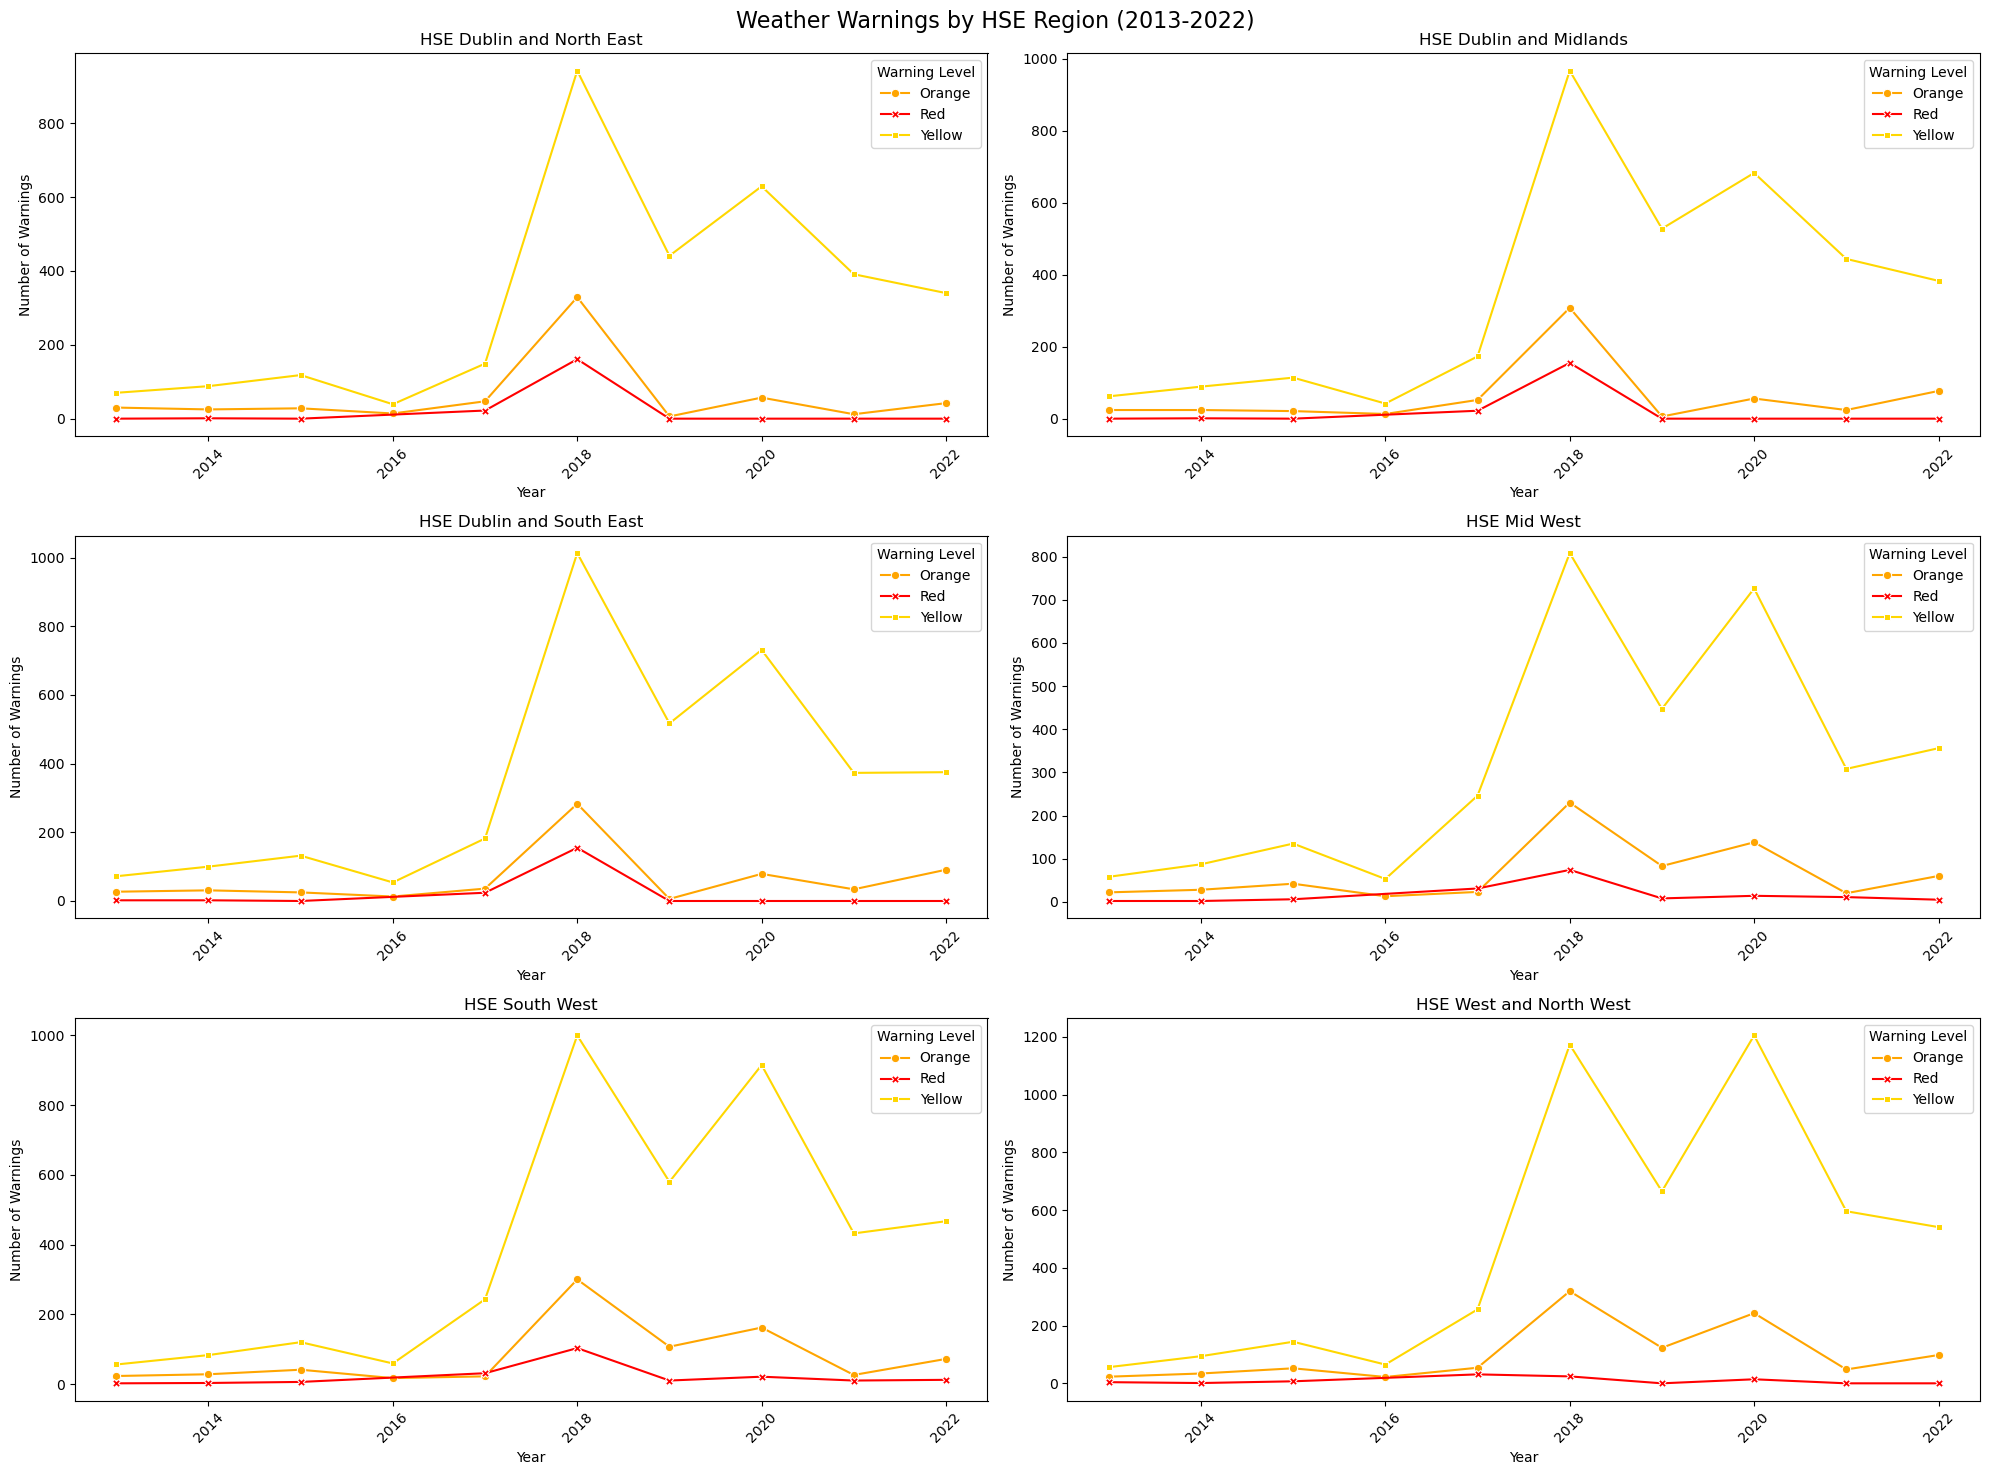

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create year column from Valid From date
df_no_minor['Year'] = df_no_minor['Valid From'].dt.year

# Create the aggregation for each HSE region, Year, and Warning Colour
results = []
for region in hse_regions.keys():
    # Group by Year and Warning Colour, sum the region column
    temp_df = df_no_minor.groupby(['Year', 'Warning Colour'])[region].sum().reset_index()
    temp_df['Region'] = region
    results.append(temp_df)

# Combine all results
plot_df = pd.concat(results)

# Create a color mapping
color_map = {'Yellow': '#FFD700', 'Orange': '#FFA500', 'Red': '#FF0000'}

# Create subplots for each region
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Weather Warnings by HSE Region (2013-2022)', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each region
for idx, region in enumerate(hse_regions.keys()):
    region_data = plot_df[plot_df['Region'] == region]
    
    sns.lineplot(data=region_data, 
                x='Year', 
                y=region, 
                hue='Warning Colour',
                palette=color_map,
                style='Warning Colour',
                markers=True,
                dashes=False,
                ax=axes[idx])
    
    axes[idx].set_title(f'{region}')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Number of Warnings')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Warning Level')

# Adjust layout
plt.tight_layout()
# Save the plot as JPEG
plt.savefig('hse_weather_warnings.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Save the new dataframe to CSV
df_no_minor.to_csv('weather_warnings_no_minor.csv', index=False)